In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('house_rental.txt',sep=",",index_col = 'Unnamed: 0')
df.head(5)

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000


In [5]:
df.reset_index(drop = True)
df =df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [6]:
df.rename(columns = {'Living.Room' : 'Living_room'})

,Sqft,Floor,TotalFloor,Bedroom,Living_room,Bathroom,Price
1,1177.698,2,7,2,2,2,62000
2,2134.800,5,7,4,2,2,78000
3,1138.560,5,7,2,2,1,58000
4,1458.780,2,7,3,2,2,45000
5,967.776,11,14,3,2,2,45000
...,...,...,...,...,...,...,...
644,1359.156,7,15,3,2,2,45000
645,377.148,4,10,1,1,1,24800
646,740.064,13,14,1,1,1,45000
647,1707.840,3,14,3,2,2,65000


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler, normalize
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics 
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [10]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3,4,5,6
count,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02,6.450000e+02
mean,7.289604e-17,1.056971e-17,-6.024466e-18,-1.684269e-16,1.984631e-16,9.191614e-17,-8.451465e-17
std,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00,1.000776e+00
min,-1.523619e+00,-1.272516e+00,-1.974190e+00,-1.819099e+00,-3.926263e+00,-2.651152e+00,-1.569526e+00
25%,-7.858412e-01,-7.572786e-01,-7.723470e-01,-8.289563e-01,4.026936e-01,-1.187117e+00,-6.455621e-01
50%,-1.362251e-01,-2.420416e-01,2.291886e-01,1.611860e-01,4.026936e-01,2.769182e-01,-3.366380e-01
75%,4.762700e-01,5.308140e-01,6.298029e-01,1.151328e+00,4.026936e-01,2.769182e-01,3.654621e-01
max,5.645358e+00,4.137473e+00,5.437174e+00,4.121755e+00,4.731650e+00,4.669023e+00,5.280163e+00


In [11]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [12]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++')
kmeans.fit(scaled_data)

KMeans(n_clusters=4)

In [14]:
kmeans.inertia_

2154.6850143778192

In [15]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1,15)
for k in K:
    kmeanModel = KMeans(n_clusters = k).fit(scaled_data)
    kmeanModel.fit(scaled_data)
    
    distortions.append(sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / scaled_data.shape[0])
    inertias.append(kmeanModel.inertia_)

    mapping1[k] = sum(np.min(cdist(scaled_data, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / scaled_data.shape[0]
    mapping2[k] = kmeanModel.inertia_   


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


1 : 2.3615265828331347
2 : 1.9847844864092707
3 : 1.7675149726354582
4 : 1.6555159312770937
5 : 1.5233413929637645
6 : 1.459940736191077
7 : 1.4137675172131265
8 : 1.3517224010136286
9 : 1.3088743612845057
10 : 1.2753867514381916
11 : 1.2564865784611685
12 : 1.2282127732957862
13 : 1.1971503247918598
14 : 1.1673238952331764


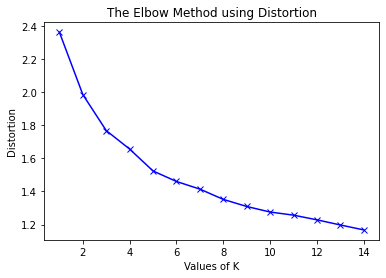

In [16]:
for key,val in mapping1.items():
    print(str(key)+ ' : ' + str(val))
    
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

1 : 4514.999999999999
2 : 3205.723708410711
3 : 2502.4897052596575
4 : 2154.1636573477804
5 : 1880.8765014113799
6 : 1725.283034512706
7 : 1593.784305213187
8 : 1494.4794732112587
9 : 1403.648735093566
10 : 1336.5703299056106
11 : 1274.4142806176417
12 : 1227.7244471167935
13 : 1188.0216294870859
14 : 1130.061837934279


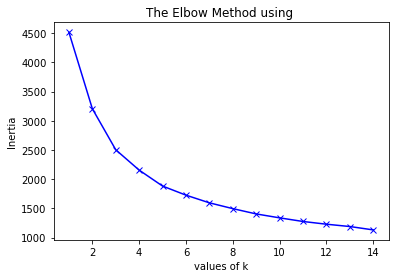

In [17]:
for key,val in mapping2.items():
    print(str(key) +' : '+ str(val))
plt.plot(K, inertias, 'bx-')
plt.xlabel('values of k')
plt.ylabel('Inertia')
plt.title('The Elbow Method using ')
plt.show()

In [18]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)

In [19]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    204
1    132
0    115
2     89
5     77
4     28
Name: cluster, dtype: int64

In [20]:
kmeans = KMeans(n_clusters = 8, init = 'k-means++')
kmeans.fit(scaled_data)
pred = kmeans.predict(scaled_data)


In [21]:
frame = pd.DataFrame(scaled_data)
frame['cluster'] = pred
frame['cluster'].value_counts()

4    135
3    114
2    111
1    103
0     82
6     65
7     18
5     17
Name: cluster, dtype: int64